In [17]:
import os
os.getcwd()

'/content'

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = pd.read_csv('news_data.csv')

In [22]:
df.shape

(9900, 2)

In [23]:
df.columns

Index(['Text', 'label'], dtype='object')

In [24]:
features = df['Text'] #input data
label = df['label'] #output data

In [25]:
features.head()

0     Top Trump Surrogate BRUTALLY Stabs Him In The...
1    U.S. conservative leader optimistic of common ...
2    Trump proposes U.S. tax overhaul, stirs concer...
3     Court Forces Ohio To Allow Millions Of Illega...
4    Democrats say Trump agrees to work on immigrat...
Name: Text, dtype: object

In [26]:
label.head()

0    Fake
1    Real
2    Real
3    Fake
4    Real
Name: label, dtype: object

<Axes: xlabel='label', ylabel='count'>

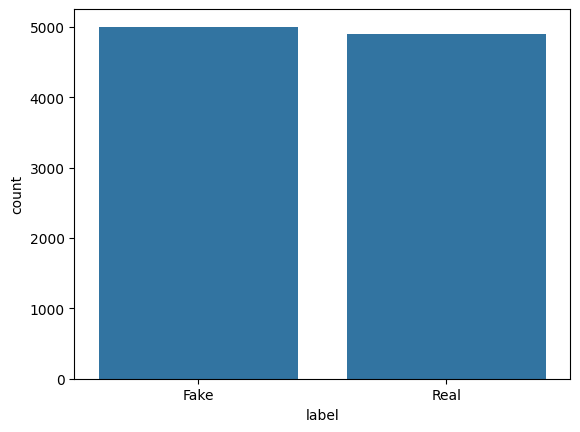

In [27]:
sns.countplot(x=label)

In [28]:
label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

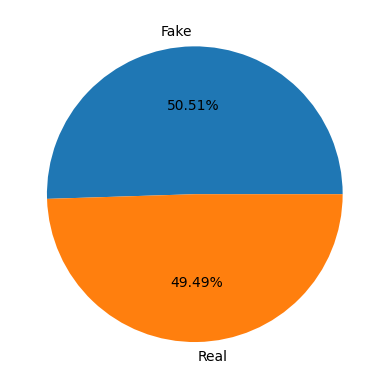

In [29]:
plt.pie(label.value_counts(), labels=label.value_counts().index, autopct='%1.2f%%');

Data Preparation

In [30]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [32]:
sent = 'Hello friends! how are you? I like Python programming'

In [33]:
tokens1 = word_tokenize(sent)
tokens1

['Hello',
 'friends',
 '!',
 'how',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'programming']

In [34]:
tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
tokens2

['hello', 'friends', 'how', 'are', 'you', 'i', 'like', 'python', 'programming']

In [35]:
swords = stopwords.words('english')

In [36]:
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
tokens3 = [x for x in tokens2 if x not in swords]

In [38]:
tokens3

['hello', 'friends', 'like', 'python', 'programming']

In [39]:
ps = PorterStemmer()

In [40]:
tokens4 = [ps.stem(x) for x in tokens3]
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [41]:
def clean_text(sent):
  tokens1 = word_tokenize(sent)
  tokens2 = [x.lower() for x in tokens1 if x.isalpha]
  tokens3 = [x for x in tokens2 if x not in swords]
  tokens4 = [ps.stem(x) for x in tokens3]
  return tokens4

In [42]:
clean_text(sent)

['hello', 'friend', '!', '?', 'like', 'python', 'program']

In [43]:
new_sent = 'It was the expected result. They told the same on fields'

In [44]:
clean_text(new_sent)

['expect', 'result', '.', 'told', 'field']

In [45]:
clean_text(features[123])

['rank',
 'dem',
 'hous',
 'russia',
 'probe',
 'explos',
 'news',
 'trump',
 'run',
 'scare',
 'everybodi',
 'still',
 'believ',
 'democraci',
 'true',
 'freedom',
 'reel',
 'fbi',
 'director',
 'jame',
 'comey',
 'fire',
 ',',
 'media',
 'member',
 'congress',
 'frantic',
 'work',
 'get',
 'deet',
 'happen',
 '.',
 'rep.',
 'adam',
 'schiff',
 ',',
 'rank',
 'member',
 'hous',
 'intellig',
 'committe',
 '(',
 'conduct',
 'investig',
 'russia',
 ')',
 ',',
 'drop',
 'truth',
 'bomb',
 'comey',
 ',',
 'trump',
 'would',
 'wise',
 'go',
 'find',
 'cave',
 'hide',
 'now.schiff',
 'ask',
 ',',
 'cnn',
 ',',
 'whether',
 'believ',
 'cover-up',
 '.',
 't.',
 'think',
 'someth',
 'wors',
 ':',
 'brazen',
 'interfer',
 'crimin',
 'investig',
 '.',
 ',',
 'presid',
 'call',
 'whole',
 'investig',
 'fake',
 ',',
 'fbi',
 'director',
 'serious',
 'look',
 'whether',
 'trump',
 'associ',
 'collud',
 'russian',
 '.',
 'end',
 'statement',
 'cnn',
 'particularli',
 'jar',
 'anybodi',
 'familiar',
 

Tfidf Vectorizer

In [46]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [48]:
features_new = tfidf.fit_transform(features)

In [49]:
features_new.shape

(9900, 76881)

In [50]:
len(tfidf.get_feature_names_out())

76881

Cross Validation

In [51]:
from sklearn.model_selection import train_test_split

In [52]:

x_train, x_test, y_train , y_test = train_test_split(features_new, label, random_state=0)

In [53]:
x_train.shape

(7425, 76881)

In [54]:
x_test.shape

(2475, 76881)

In [55]:

y_train.shape
y_test.shape

(2475,)

In [56]:

x_train[0]

<1x76881 sparse matrix of type '<class 'numpy.float64'>'
	with 185 stored elements in Compressed Sparse Row format>

In [57]:
y_train[0]

'Fake'

Build the Decision Tree Algorithm model on the training data


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier(random_state=0)

In [60]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [61]:
from sklearn.tree import plot_tree

[Text(0.5555555555555556, 0.875, 'x[430] <= 0.002\ngini = 0.5\nsamples = 7425\nvalue = [3727, 3698]'),
 Text(0.3333333333333333, 0.625, 'x[76875] <= 0.08\ngini = 0.001\nsamples = 3719\nvalue = [3717, 2]'),
 Text(0.2222222222222222, 0.375, 'x[6181] <= 0.127\ngini = 0.001\nsamples = 3718\nvalue = [3717, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 3717\nvalue = [3717, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.625, 'x[59071] <= 0.002\ngini = 0.005\nsamples = 3706\nvalue = [10, 3696]'),
 Text(0.6666666666666666, 0.375, 'x[40023] <= 0.011\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 3694\nvalue = [0, 3694]')]

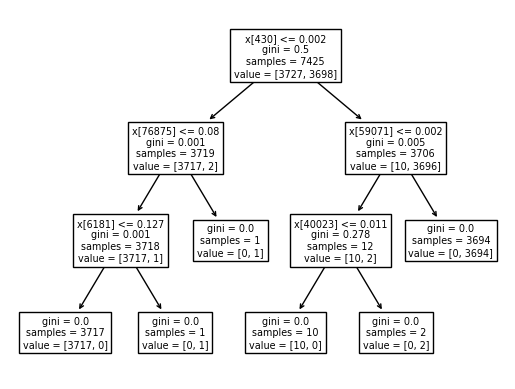

In [62]:
plot_tree(dt)

[Text(0.5555555555555556, 0.875, 'x[430] <= 0.002\ngini = 0.5\nsamples = 7425\nvalue = [3727, 3698]'),
 Text(0.3333333333333333, 0.625, 'x[76875] <= 0.08\ngini = 0.001\nsamples = 3719\nvalue = [3717, 2]'),
 Text(0.2222222222222222, 0.375, 'x[6181] <= 0.127\ngini = 0.001\nsamples = 3718\nvalue = [3717, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 3717\nvalue = [3717, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.625, 'x[59071] <= 0.002\ngini = 0.005\nsamples = 3706\nvalue = [10, 3696]'),
 Text(0.6666666666666666, 0.375, 'x[40023] <= 0.011\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 3694\nvalue = [0, 3694]')]

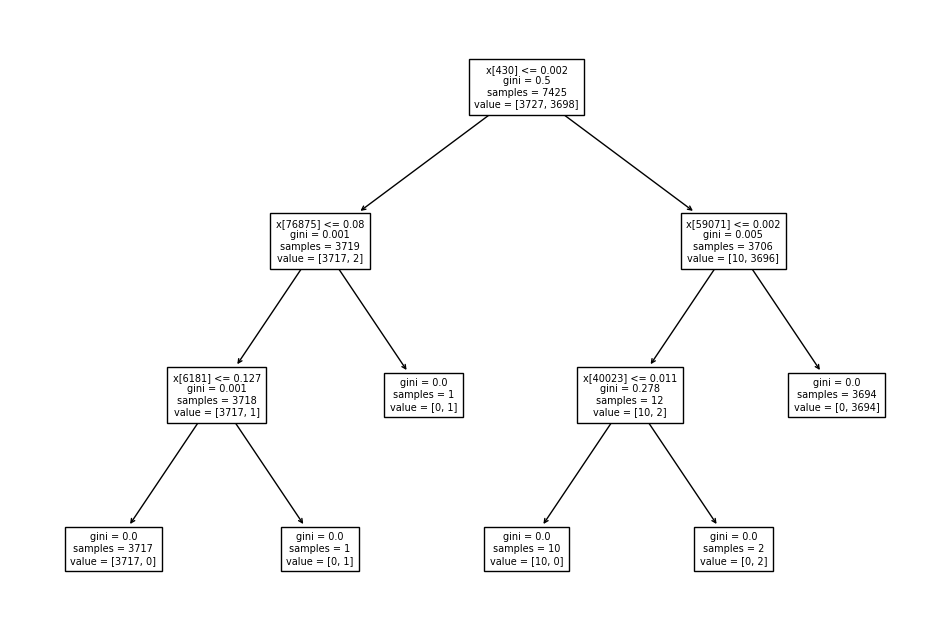

In [63]:
plt.figure(figsize=(12,8))
plot_tree(dt, fontsize=7)

In [64]:
tfidf.get_feature_names_out()[9696]

'amandachard'

Performance Evaluation

In [65]:
y_pred = dt.predict(x_test)

In [66]:
y_pred

array(['Fake', 'Fake', 'Fake', ..., 'Fake', 'Fake', 'Fake'], dtype=object)

In [67]:
len(y_pred)

2475

In [68]:
#import the class
from sklearn.metrics import ConfusionMatrixDisplay

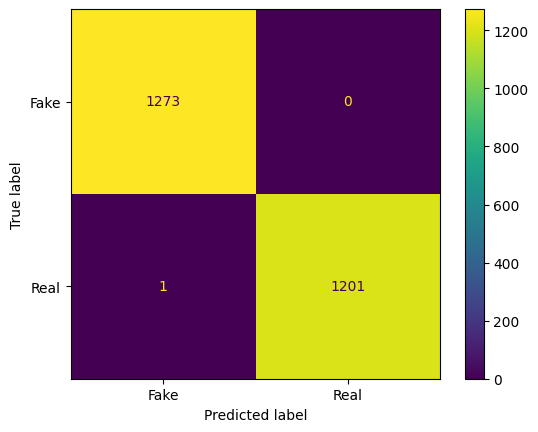

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Prediction on unseen new news


In [70]:
f = open('sample_news.txt', encoding='utf-8')

In [71]:
news = f.readlines()
news


['" Donald Trump’s ‘Charity’ Foundation Is About To Be Shut The F**k Down NATIONWIDE Things really aren t looking too great for Donald Trump s charity foundation. With recent developments prohibiting the Trump Foundation from soliciting funds in New York state, it s now looking like a good majority of states may be following suit.The Trump Foundation has also been being looked at by the Attorney General for how it is getting and spending funds, especially after what happen with veterans organizations earlier this year.According to The Daily Beast: To make matters worse for the Trump Foundation, the probe may not be limited to New York: Charity experts and lawyers tell The Daily Beast that the attorneys general of other states may soon get involved in a long, drawn-out process.All major charities are required to register with 41 different states across the nation in order to individually request permission to fundraise. When Trump raised money for veterans, he may have broken the rules 

In [72]:
tfidf.transform(news)

<3x76881 sparse matrix of type '<class 'numpy.float64'>'
	with 375 stored elements in Compressed Sparse Row format>

In [73]:
dt.predict(tfidf.transform(news))

array(['Fake', 'Real', 'Fake'], dtype=object)